In [2]:
# open sheet1_preprocessed.xlsx 
# read the first column

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('sheet1_preprocessed.xlsx')

In [3]:
df.head()

,Unnamed: 0,Sample ID,Firmicutes,Proteobacteria,Actinobacteria,Tenericutes,Bacteroidetes,Armatimonadetes,Spirochaetes,Planctomycetes,...,Dictyoglomi,Balneolaeota,Fibrobacteres,Chlamydiae,Acidobacteria,Kiritimatiellaeota,Nitrospirae,candidate.division.Zixibacteria,Thermodesulfobacteria,Infertile
0,0,UAB 18020,53.4006,15.7427,1.4199,0.0117,27.5289,0.1681,0.0846,0.0496,...,0.0097,0.001,0.0,0.0019,0.0010,0.0,0.0,0.0000,0.0029,1
1,1,CON 02,70.9169,8.3693,15.3492,0.0167,0.6654,0.0167,0.0377,0.0042,...,0.0000,0.000,0.0,0.0084,0.0000,0.0,0.0,0.0000,0.0000,0
2,2,UAB 18019,72.4873,17.8601,7.1422,0.0019,0.5271,0.0150,0.1477,0.0000,...,0.0000,0.000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,1
3,3,CON 14,17.3937,61.7182,5.1900,11.5383,3.0066,0.0000,0.0049,0.0000,...,0.0000,0.000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0
4,4,UAB 17006,74.4002,10.1792,13.0713,0.0112,0.2280,0.0273,0.0273,0.0048,...,0.0000,0.000,0.0,0.0000,0.1076,0.0,0.0,0.0032,0.0000,1


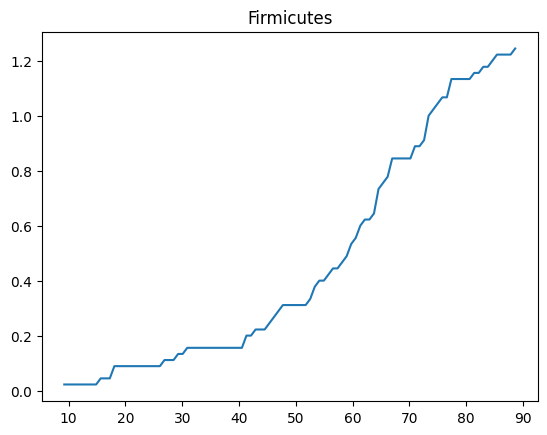

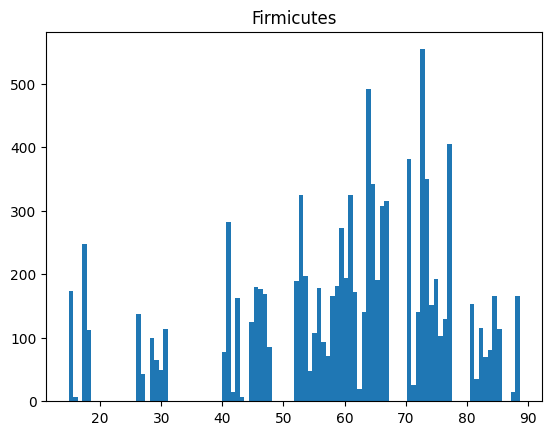

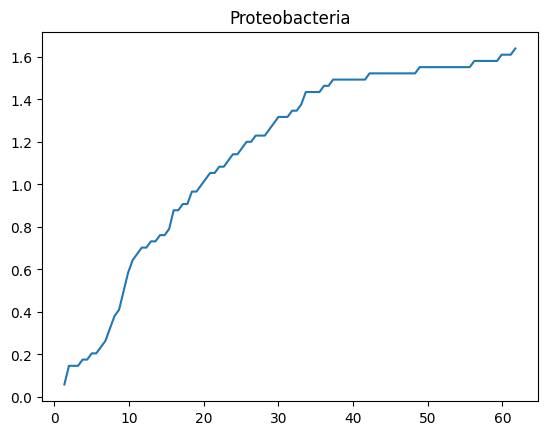

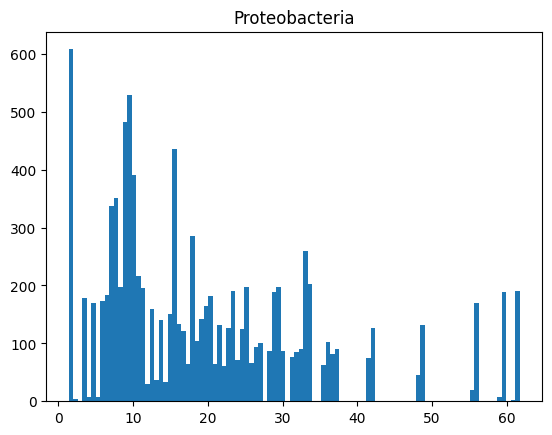

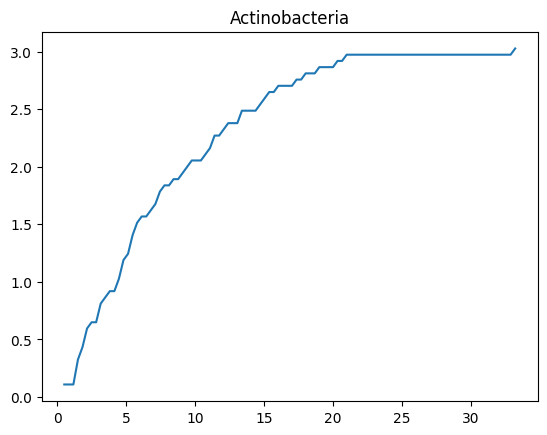

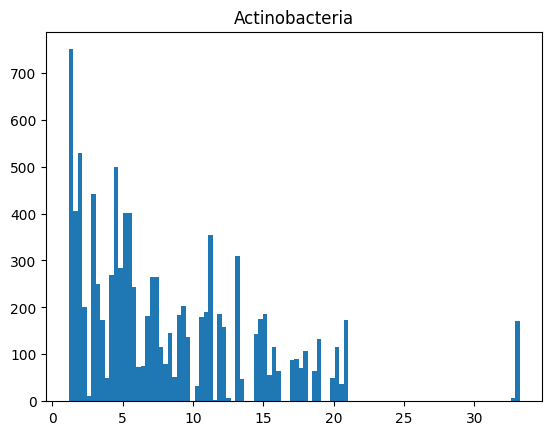

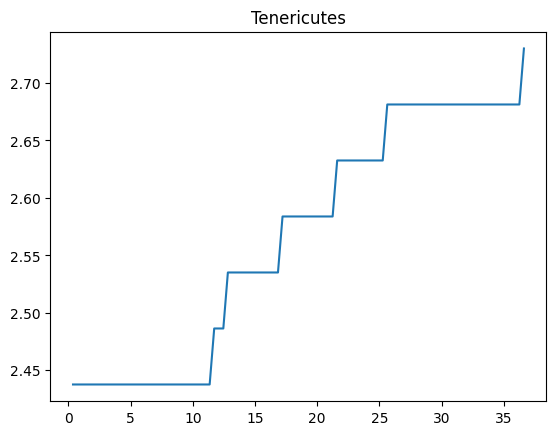

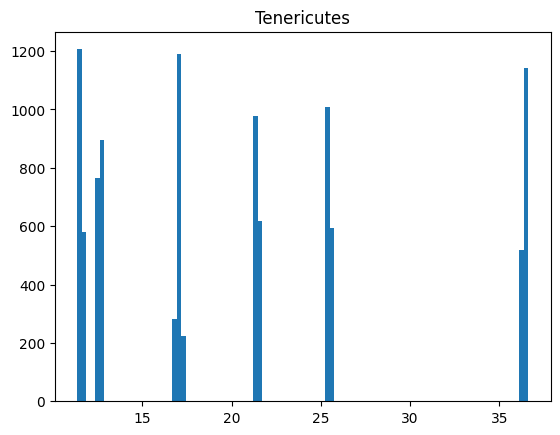

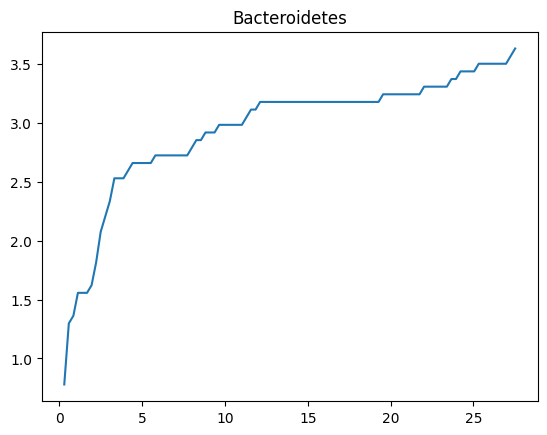

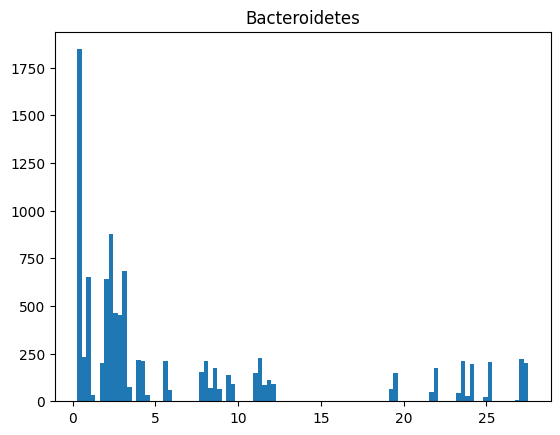

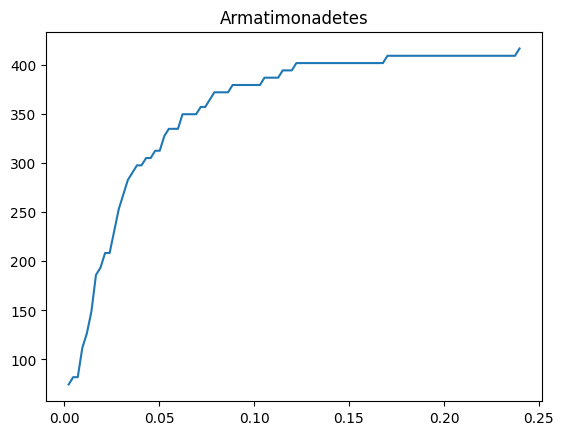

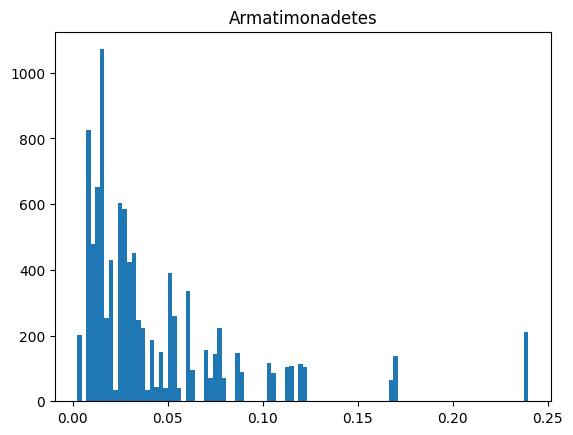

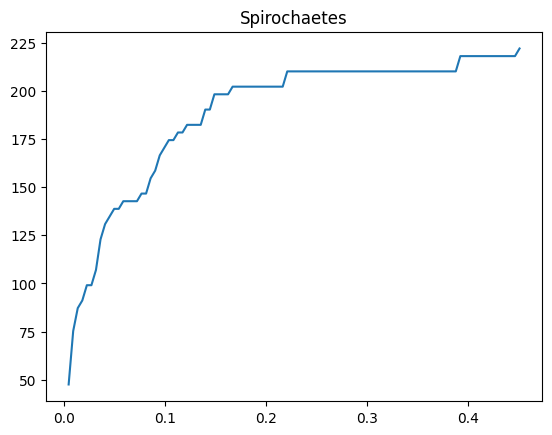

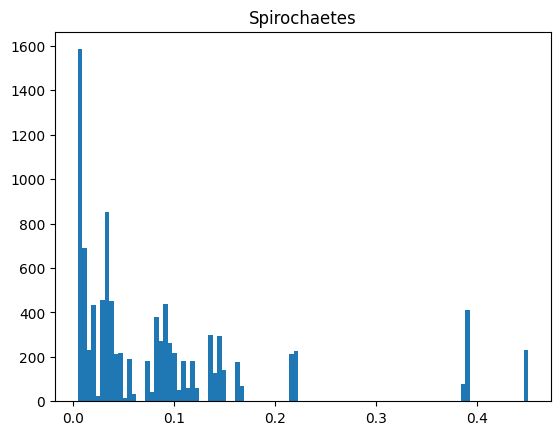

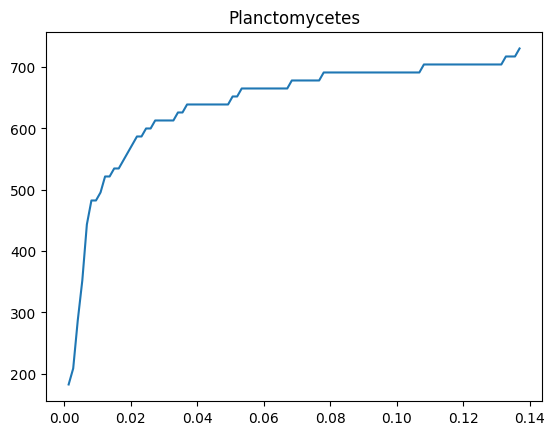

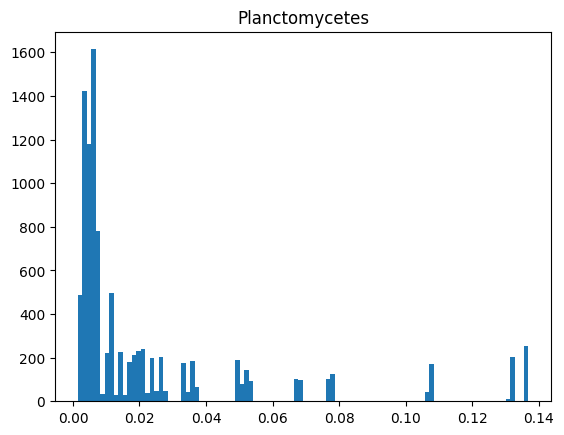

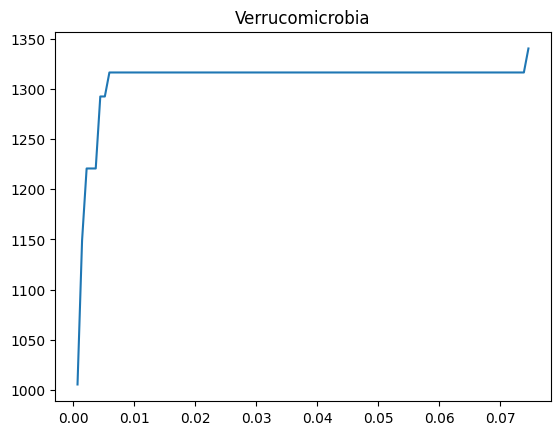

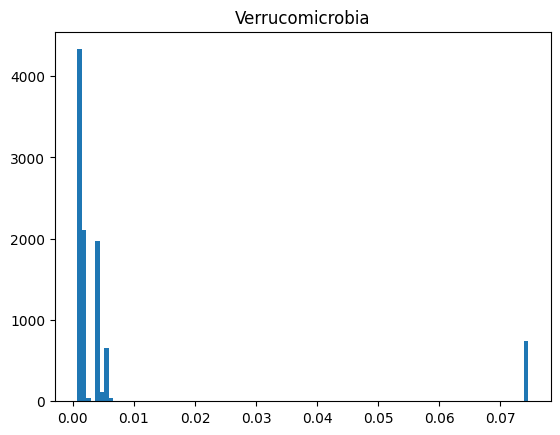

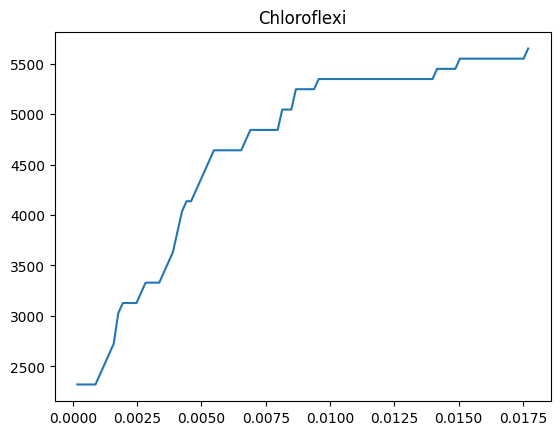

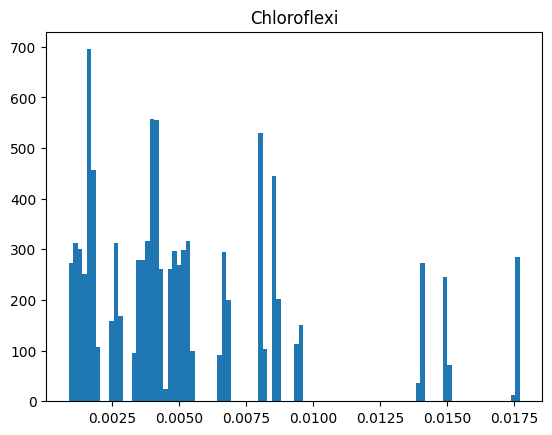

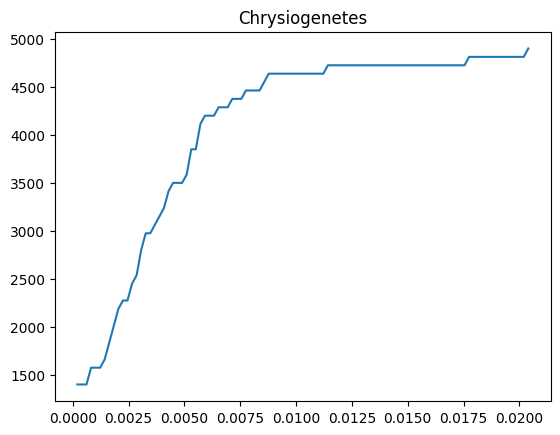

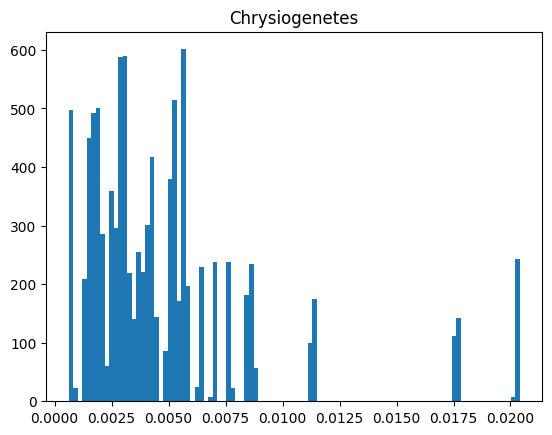

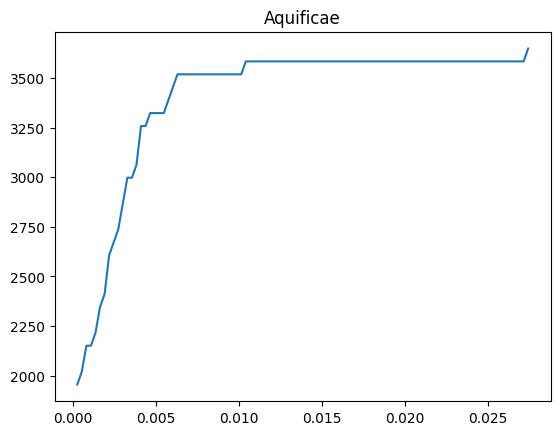

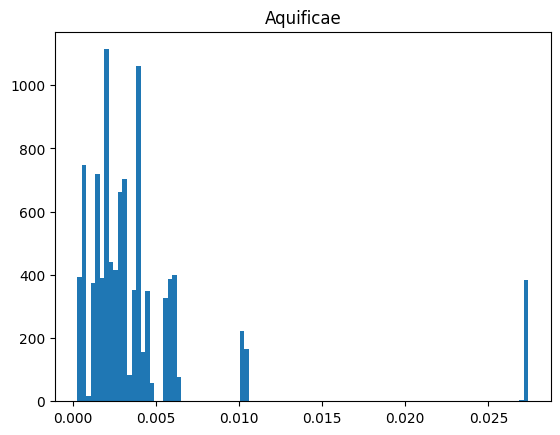

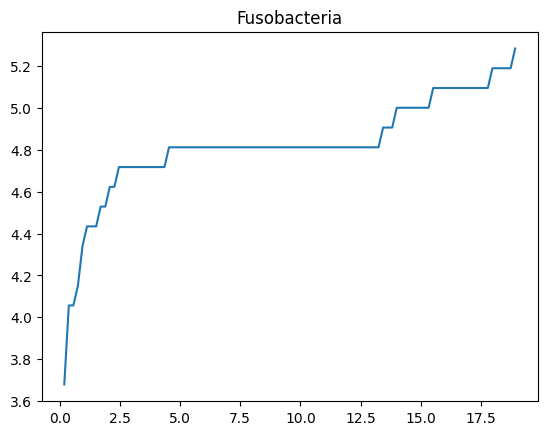

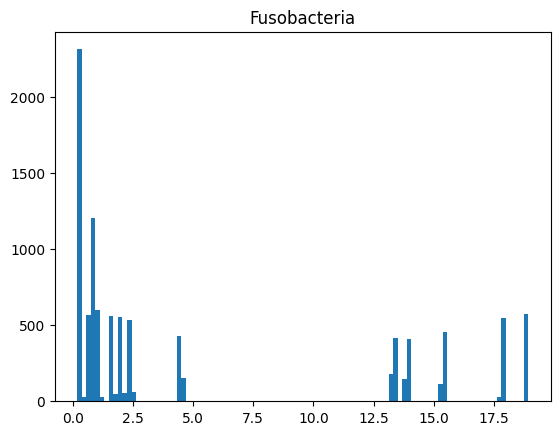

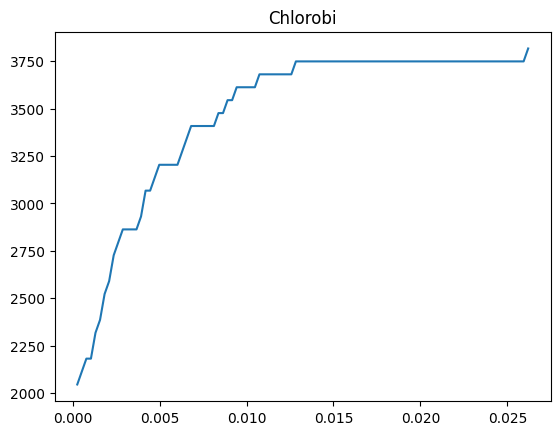

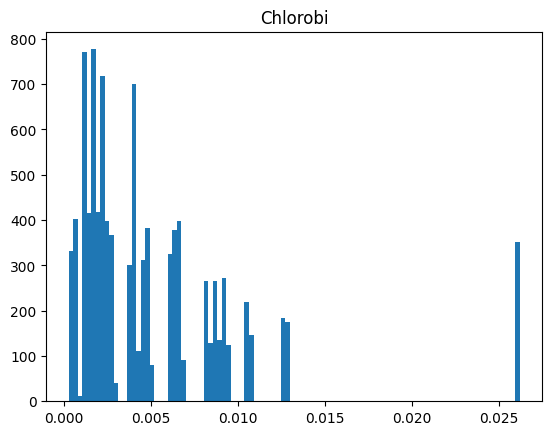

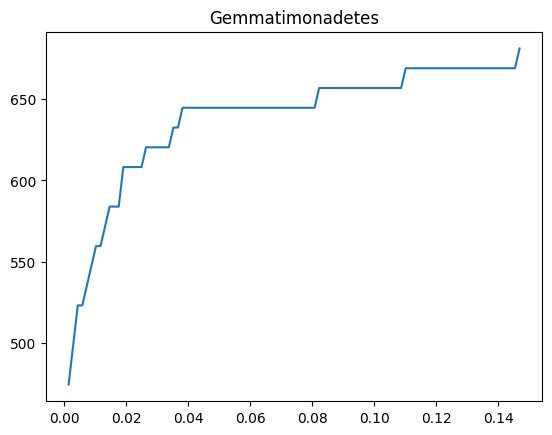

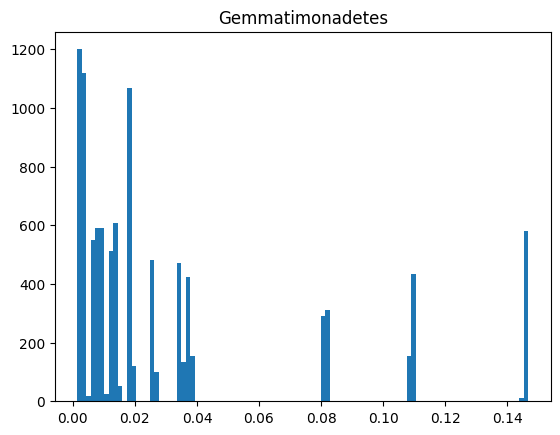

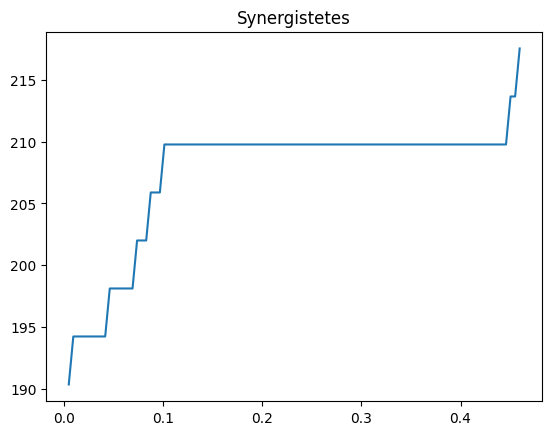

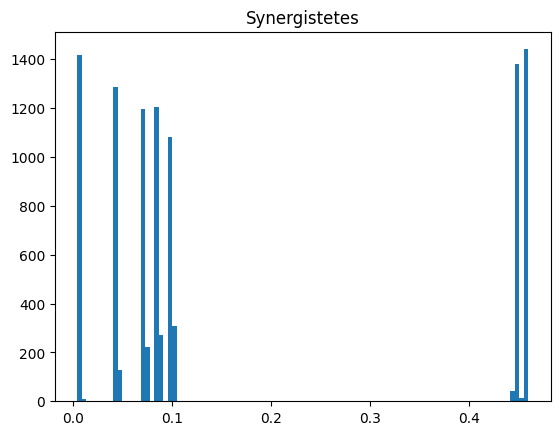

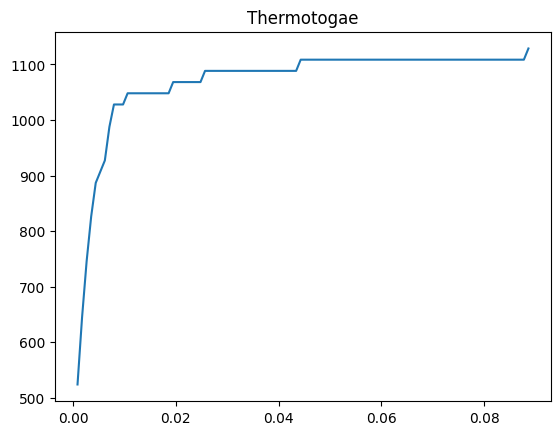

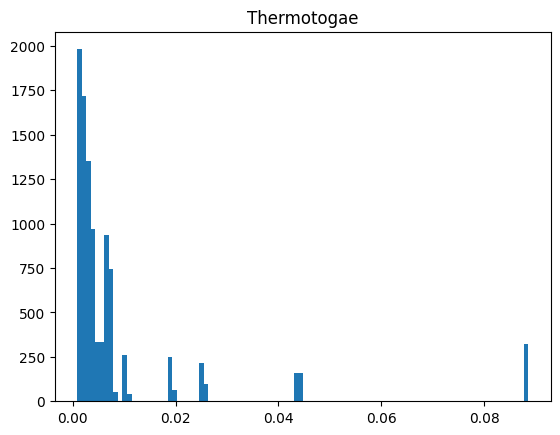

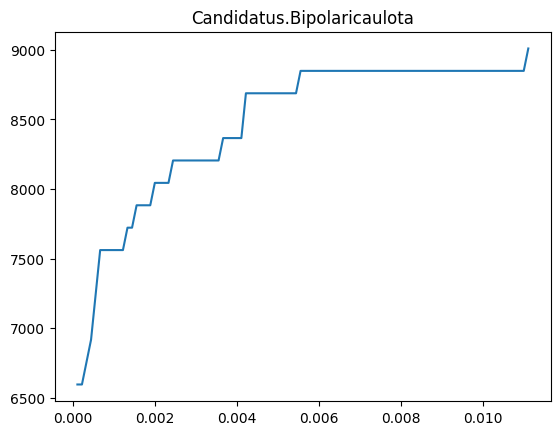

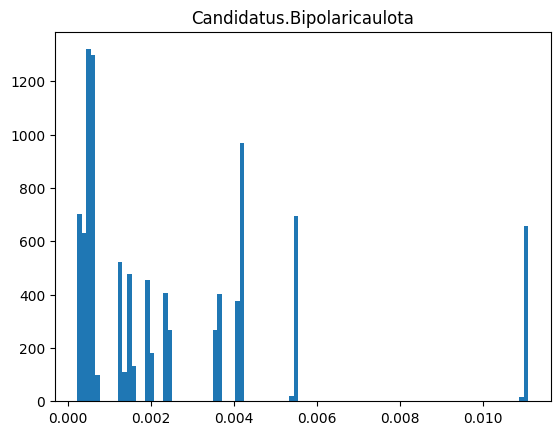

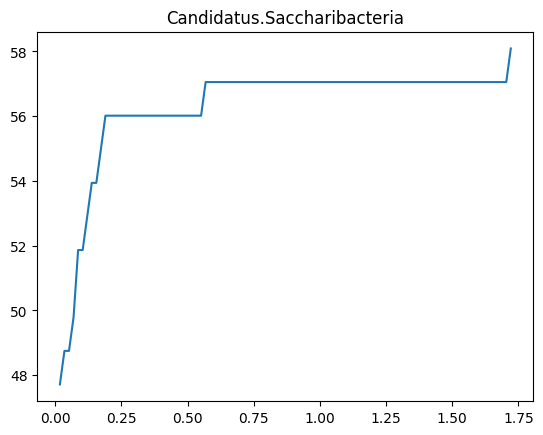

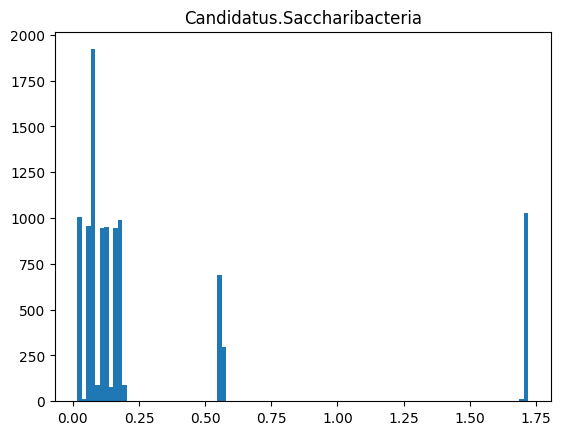

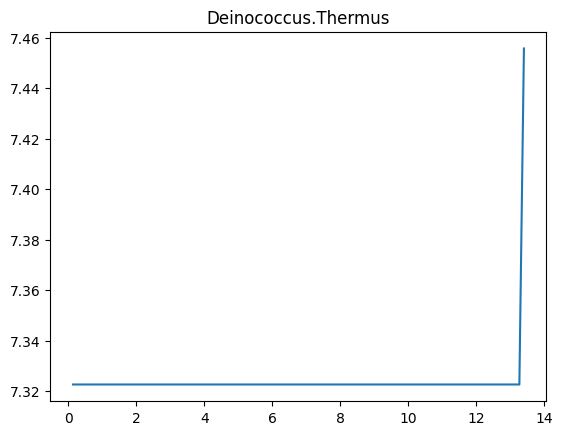

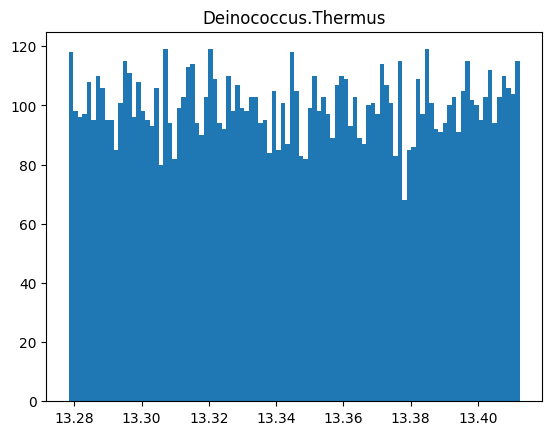

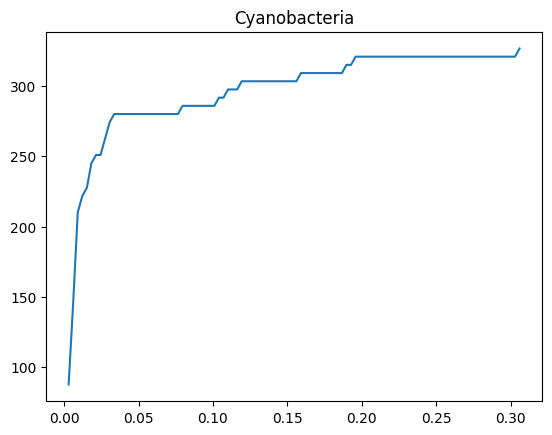

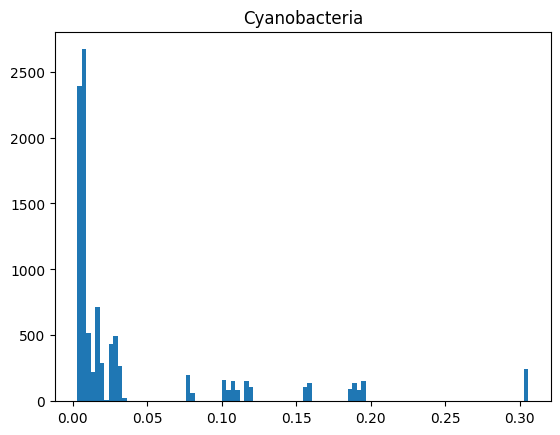

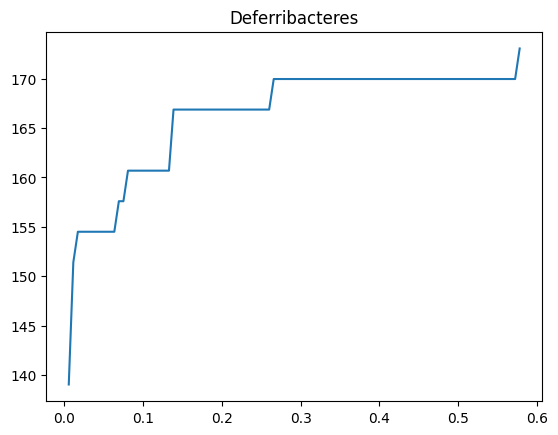

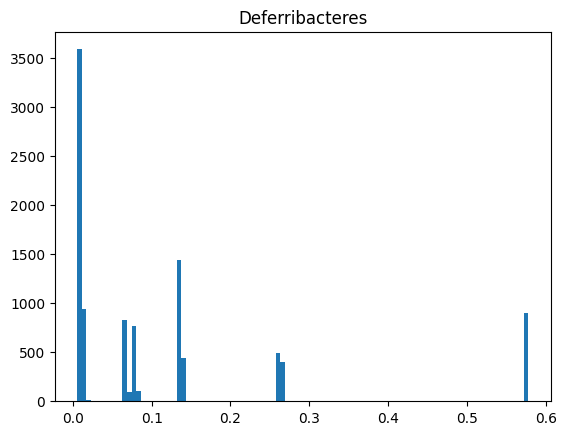

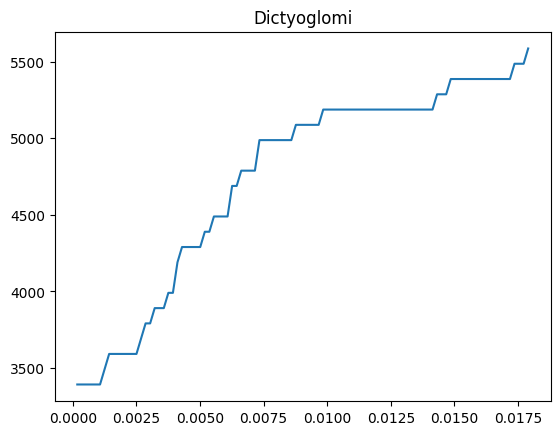

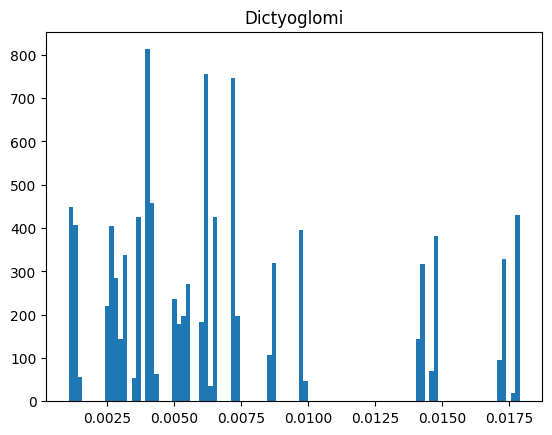

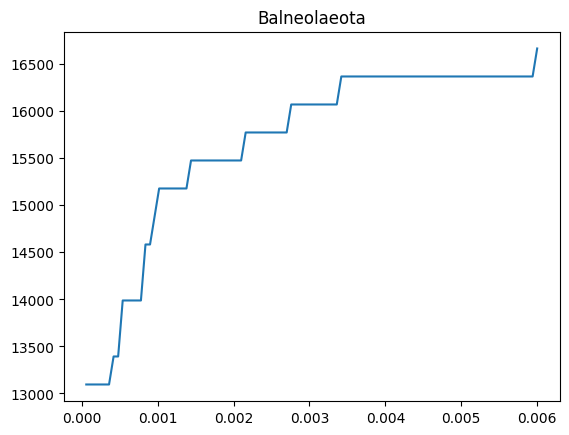

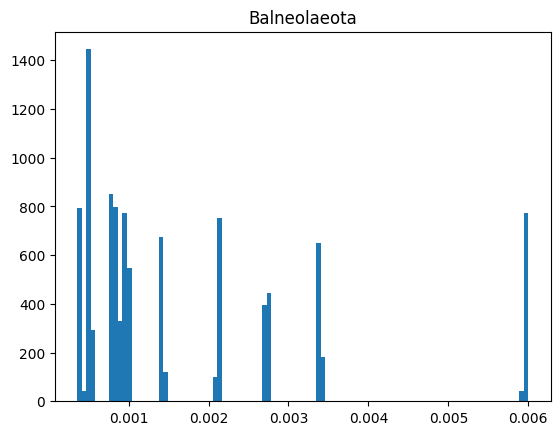

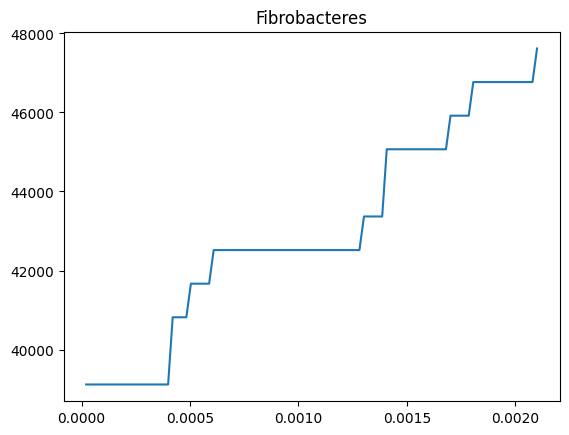

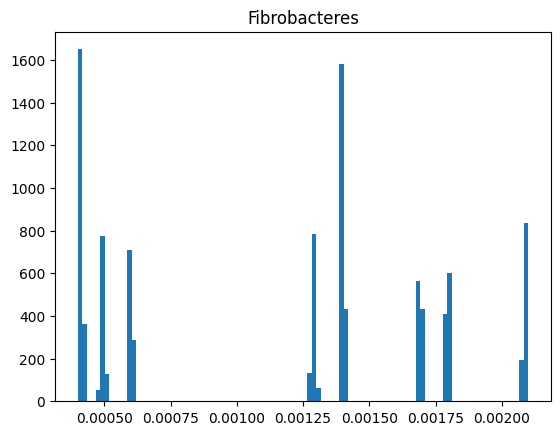

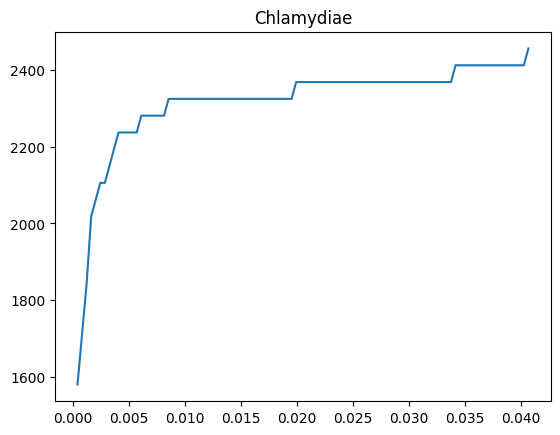

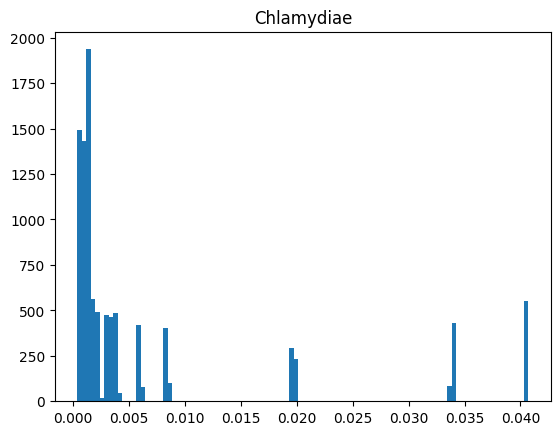

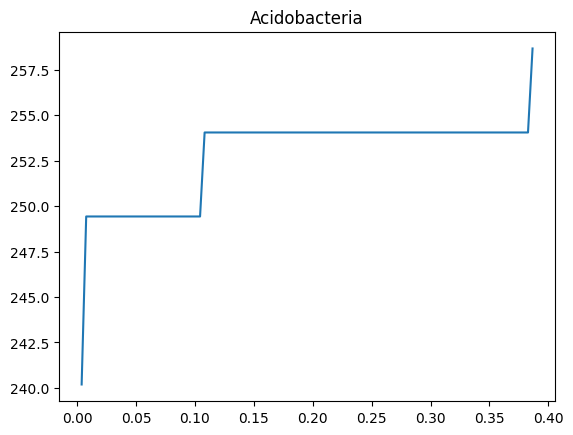

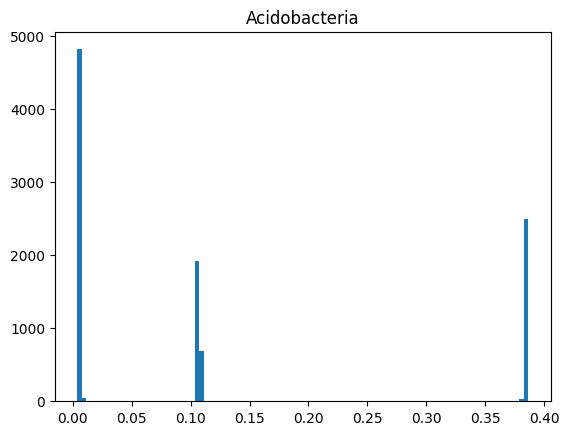

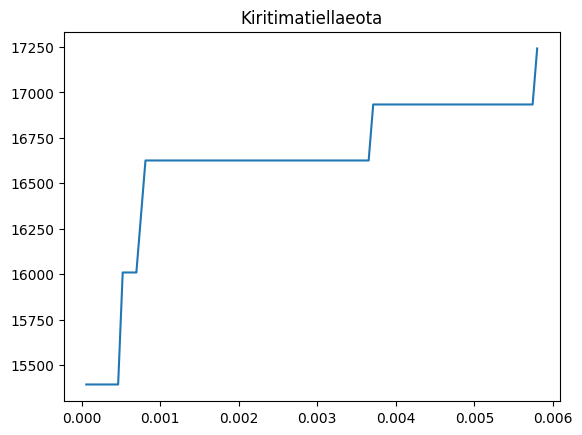

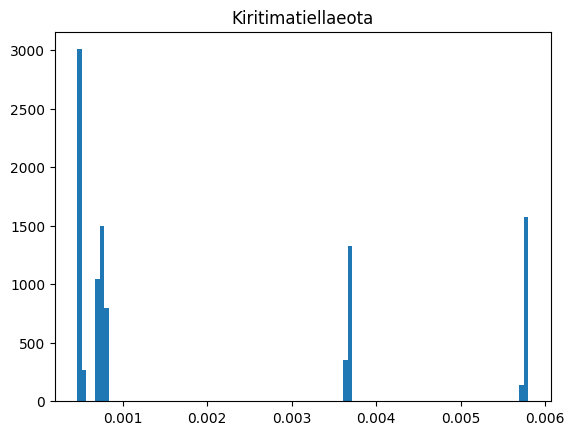

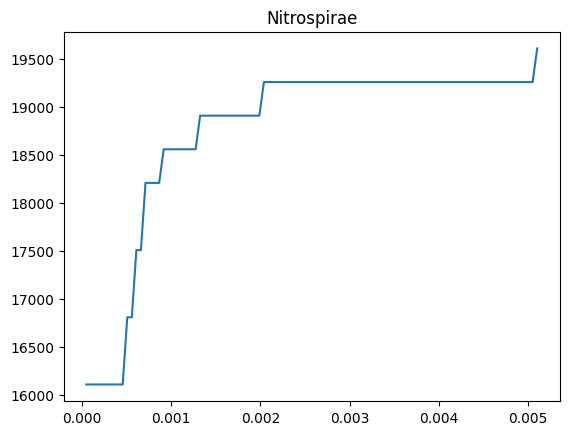

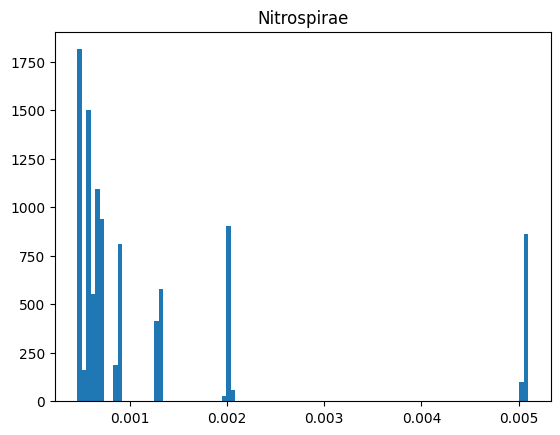

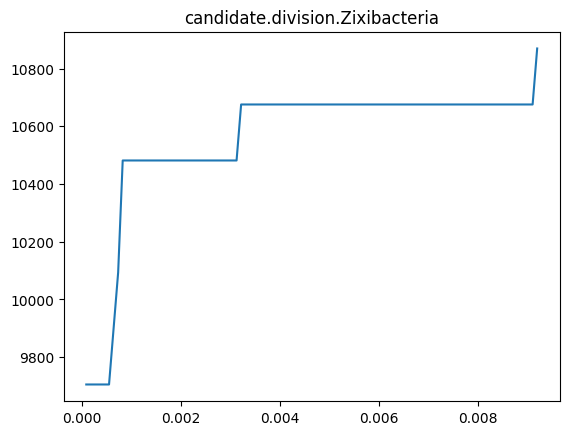

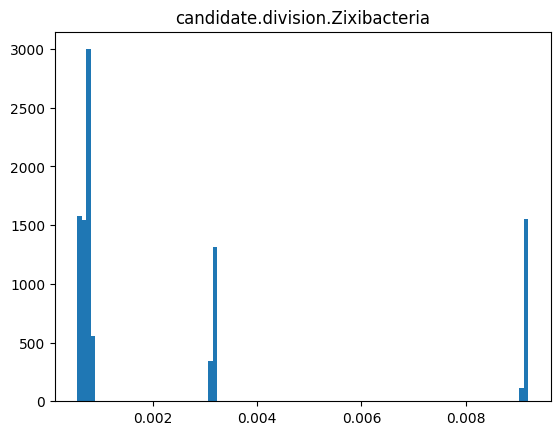

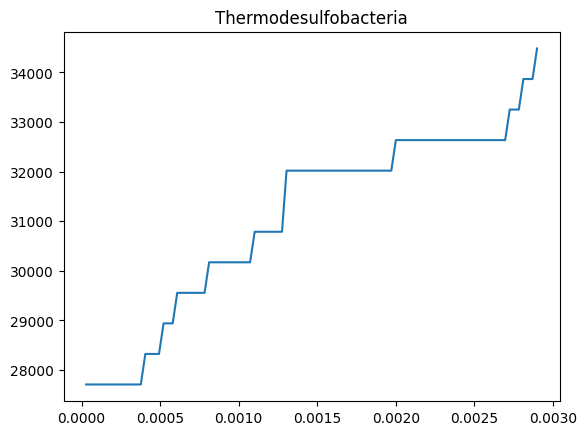

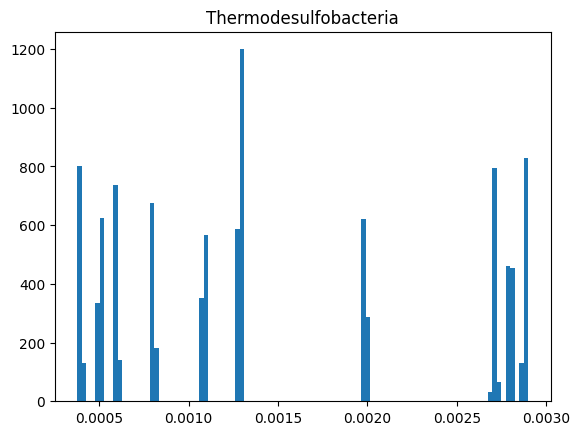

In [34]:
# extract the distribution probability per each column
import random


columns_to_exclude = ['Unnamed: 0', 'Sample ID', 'Infertile']

distribution_probabilities = {}
dt_random = {}

for (column_name, column_data) in df.items():
    if column_name not in columns_to_exclude:
        # extract distribution probability function from the column data
        distribution_probabilities[column_name] = np.histogram(column_data, bins=100, density=True)
        # convert to continuos distribution function
        distribution_probabilities[column_name] = (distribution_probabilities[column_name][0].cumsum(), distribution_probabilities[column_name][1][1:])
        # plot the distribution
        plt.plot(distribution_probabilities[column_name][1], distribution_probabilities[column_name][0])
        plt.title(column_name)
        plt.show()

        max_value = distribution_probabilities[column_name][0][-1]
        min_value = distribution_probabilities[column_name][0][0]

        # generate random numbers between 0 and 1
        random_numbers = np.random.rand(10000)
        # normalize the random numbers to the range of the distribution
        random_numbers = random_numbers * (max_value - min_value) + min_value

        # generate the random_samples given random_numbers and distribution_probabilities

        random_samples = np.interp(random_numbers, distribution_probabilities[column_name][0], distribution_probabilities[column_name][1])          
    

        # plot the random samples
        plt.hist(random_samples, bins=100)
        plt.title(column_name)
        plt.show()

        # add the random samples to the dataframe
        dt_random[column_name] = random_samples

# save the dataframe to a new excel file
df_random = pd.DataFrame(dt_random)
df_random.to_excel('sheet1_random.xlsx')
